# 선형 회귀

## 1. k-최근접 이웃회귀의 한계

#### 훈련용 농어 데이터는 길이가 5~45cm인 데이터를 가지고 훈련
#### 45cm 이상인 데이터에 대해서는 옳바르게 예측하지 못함.

In [ ]:
# 04장에서 사용한 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [8]:
# 훈련 세트. 테스트 세트를 2차원 배열로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [20]:
# 최근접 갯수를 3으로하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [22]:
# 50cm 농어의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


### 실제 농어 무게는 1.5kg임

## 2. 산점도 확인

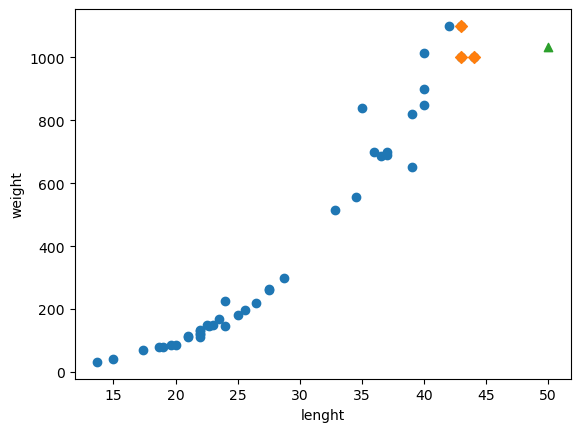

In [27]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터 그리기
plt.scatter(50, 1033, marker='^')

plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [29]:
# 50cm 인접한 농어 샘플의 평균 무게 
print(np.mean(train_target[indexes]))

1033.3333333333333


In [30]:
print(knr.predict([[100]]))

[1033.33333333]


## 3. 선형 회귀

#### 사이킷런의 선형 회귀 알고리즘 구현 클래스 : LineartRegression
#### 선형 회귀 알고리즘은 입력된 데이터를 가지고 1차원 방정식의 계수와 절편을 찾아내는 알고리즘 -> 입력한 데이터의 직선 규칙을 찾아내는 것 

In [23]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
# 선형 회기 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


#### LinearRegression이 찾은 계수와 절편값

In [25]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


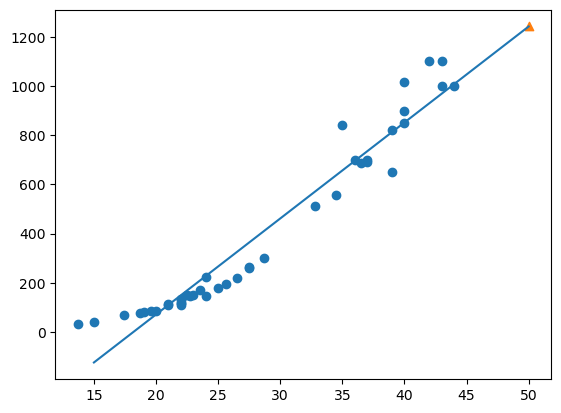

In [34]:
# 훈련세트의 산점도
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50 *lr.coef_ + lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [35]:
print(lr.score(train_input, train_target))

0.939846333997604


In [36]:
print(lr.score(test_input, test_target))

0.8247503123313558


## 앞의 선형 회기의 문제점

#### (1). 모델 측정결과 과대적합 문제 발생
#### (2). 농어의 길이가 줄어들수록 0g 이하로 내려가야하는 형상 발생.
####      하지만 실제 입력 데이터의 형태는 왼쪽 위로 구부러진 형태임.

#### 데이터에 맞는 직선을 찾기 보다는 최적의 곡선을 찾으면 어떨까?

# 4. 다항회귀

### 왼쪽으로 휘어진 최적의 곡선을 찾기위해 특성을 농어의 길이, 길이를 제곱한 항을 추가하여 훈련

In [37]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

#### train_poly를 이용해 선형 회귀 모델 다시 훈련

In [38]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


#### 앞서 훈련한 모델보다 더 높은 값을 예측

### 계수와 절편 출력

In [42]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


### 앞에서 학습한 모델은 다음과 같다.
#### 농어의 무게 = 1.0143 * $길이^2$ - 21.557 * 길이 + 116.05
#### 이식은 다음과 같이 치환 가능함
#### 무게 = 1.0143 * 대길이 - 21.557 * 길이 + 116.050

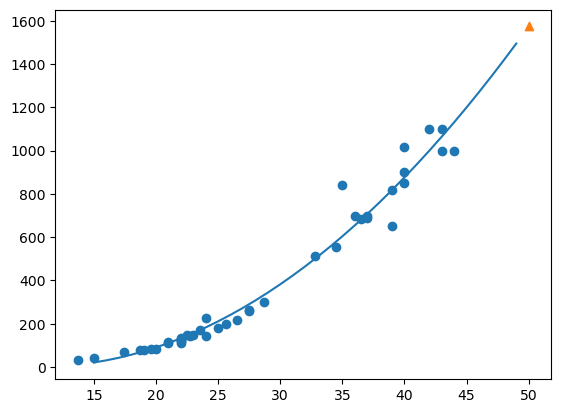

In [48]:
# 학습한 직선 그리기

# 구간별 직석을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15에서 49까지 학습한 모델의 차트를 그린다.
plt.plot(point, 1.0143 * point**2 - 21.557*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker = '^')
plt.show()

### 훈련 세트와 테스트 세트의 $R^2$ 의 점수 평가

In [46]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [47]:
print(lr.score(test_poly, test_target))

0.9775935108325121


#### 테스트에 대한 점수가 높아 과소적합 문제가 남아있지만, 전보다는 좋은 모델을 찾아냄.